In [2]:
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pmdarima as pm

In [3]:
data = pd.read_csv('GOOG.csv')
Date1 = data['Date']
Price = data['Open']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Price': Price
                              }))
new_data_df = pd.concat(new_data)
new_data_df.dropna(inplace=True)
new_data_df.info()
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])  # Ensure the date column is in datetime format
df = new_data_df.set_index('Date')  # Set the date column as the index of the DataFrame

# Agregați datele în time frame-uri săptămânale
df_monthly = df.resample('M').mean()  # puteți utiliza și alte metode de agregare, cum ar fi 'sum', 'max', 'min', etc.
df = df_monthly

# Vizualizați DataFrame-ul rezultat cu time frame-uri săptămânale
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2108 non-null   object 
 1   Price   2108 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.1+ KB
                 Price
Date                  
2015-01-31   25.590965
2015-02-28   26.722423
2015-03-31   27.941264
2015-04-30   26.998340
2015-05-31   26.773525
...                ...
2023-01-31   93.452400
2023-02-28   96.679420
2023-03-31   97.935652
2023-04-30  105.994473
2023-05-31  110.966539

[101 rows x 1 columns]


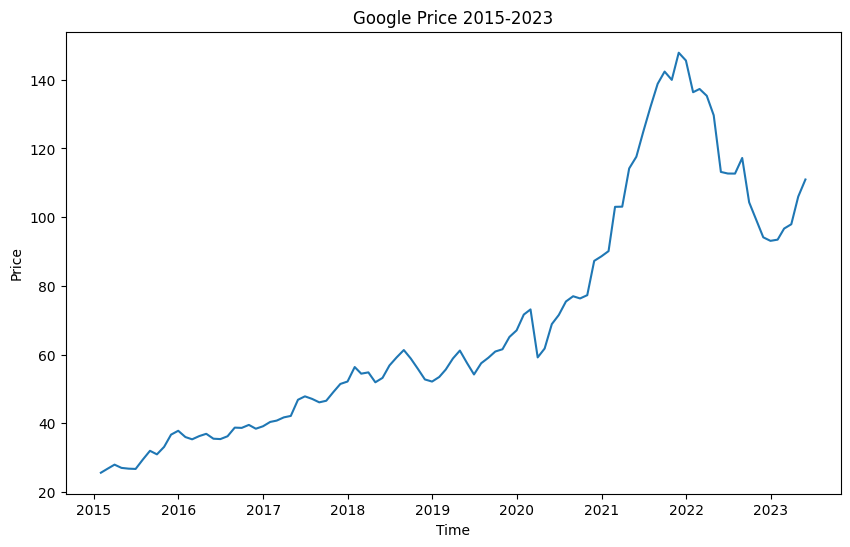

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['Price'])
plt.title('Google Price 2015-2023')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
# Perform Dickey-Fuller test
result_adf = adfuller(df['Price'])
output_adf = pd.Series(result_adf[0:4], index=['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result_adf[4].items():
    output_adf['Critical Value (ADF) (%s)'%key] = value

# Perform KPSS test
result_kpss = kpss(df['Price'], regression='c')
output_kpss = pd.Series(result_kpss[0:3], index=['KPSS Statistic', 'p-value', '#Lags Used'])
for key,value in result_kpss[3].items():
    output_kpss['Critical Value (KPSS) (%s)'%key] = value


print(output_adf)
print(output_kpss)

ADF Statistic                   0.448556
p-value                         0.983223
#Lags Used                     13.000000
Number of Observations Used    87.000000
Critical Value (ADF) (1%)      -3.507853
Critical Value (ADF) (5%)      -2.895382
Critical Value (ADF) (10%)     -2.584824
dtype: float64
KPSS Statistic                  1.497866
p-value                         0.010000
#Lags Used                      5.000000
Critical Value (KPSS) (10%)     0.347000
Critical Value (KPSS) (5%)      0.463000
Critical Value (KPSS) (2.5%)    0.574000
Critical Value (KPSS) (1%)      0.739000
dtype: float64


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


                Price  price_diff
Date                             
2015-02-28  26.722423    1.131458
2015-03-31  27.941264    1.218841
2015-04-30  26.998340   -0.942924
2015-05-31  26.773525   -0.224816
2015-06-30  26.691739   -0.081786


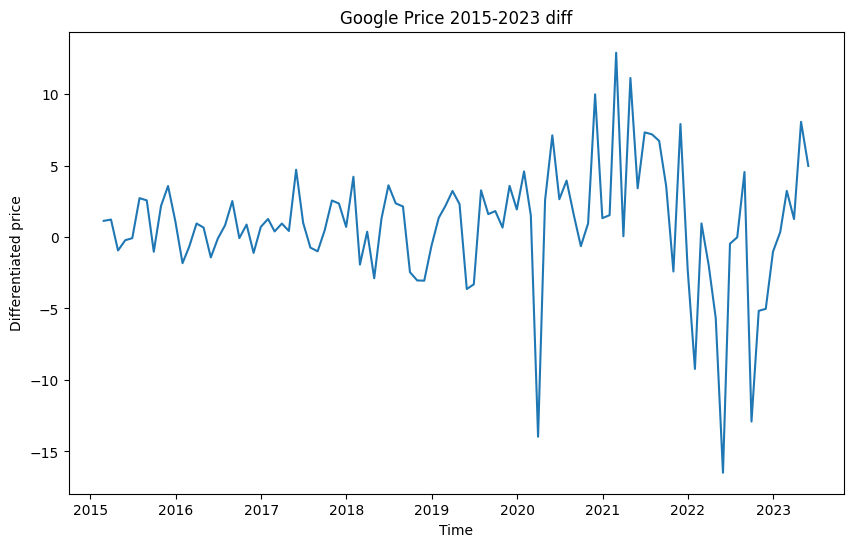

In [6]:
# df is your DataFrame and 'price' is the column with the time series
df['price_diff'] = df['Price'].diff()

# Drop the missing values that were created by diff()
df = df.dropna()

# View the differenced data
print(df.head())
plt.figure(figsize=(10, 6))
plt.plot(df['price_diff'])
plt.title('Google Price 2015-2023 diff')
plt.xlabel('Time')
plt.ylabel('Differentiated price')
plt.show()

In [7]:
# Perform Dickey-Fuller test
result_adf = adfuller(df['price_diff'])
output_adf = pd.Series(result_adf[0:4], index=['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in result_adf[4].items():
    output_adf['Critical Value (ADF) (%s)'%key] = value

# Perform KPSS test
result_kpss = kpss(df['price_diff'], regression='c')
output_kpss = pd.Series(result_kpss[0:3], index=['KPSS Statistic', 'p-value', '#Lags Used'])
for key,value in result_kpss[3].items():
    output_kpss['Critical Value (KPSS) (%s)'%key] = value


print(output_adf)
print(output_kpss)

ADF Statistic                  -4.843502
p-value                         0.000045
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (ADF) (1%)      -3.507853
Critical Value (ADF) (5%)      -2.895382
Critical Value (ADF) (10%)     -2.584824
dtype: float64
KPSS Statistic                  0.09405
p-value                         0.10000
#Lags Used                      3.00000
Critical Value (KPSS) (10%)     0.34700
Critical Value (KPSS) (5%)      0.46300
Critical Value (KPSS) (2.5%)    0.57400
Critical Value (KPSS) (1%)      0.73900
dtype: float64


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Interpretare ADF:

Statistica ADF este mai mică decât valorile critice la nivelurile de semnificație 1%, 5% și 10%, ceea ce indică faptul că putem respinge ipoteza nulă a non-staționarității.
P-value este mai mic decât nivelul de semnificație de 0.05, ceea ce sugerează că putem respinge ipoteza nulă și considerăm că seria de timp este staționară.

Interpretare KPSS:

Statistica KPSS este mai mică decât valorile critice la toate nivelurile de semnificație, ceea ce indică că nu putem respinge ipoteza nulă a staționarității.
P-value este mai mare decât nivelul de semnificație de 0.05, ceea ce sugerează că nu putem respinge ipoteza nulă și considerăm că seria de timp este staționară.
În concluzie, rezultatele indică faptul că seria de timp este staționară. Testul ADF a oferit dovezi solide în favoarea staționarității, în timp ce testul KPSS a oferit rezultate consistente cu ipoteza nulă a staționarității.

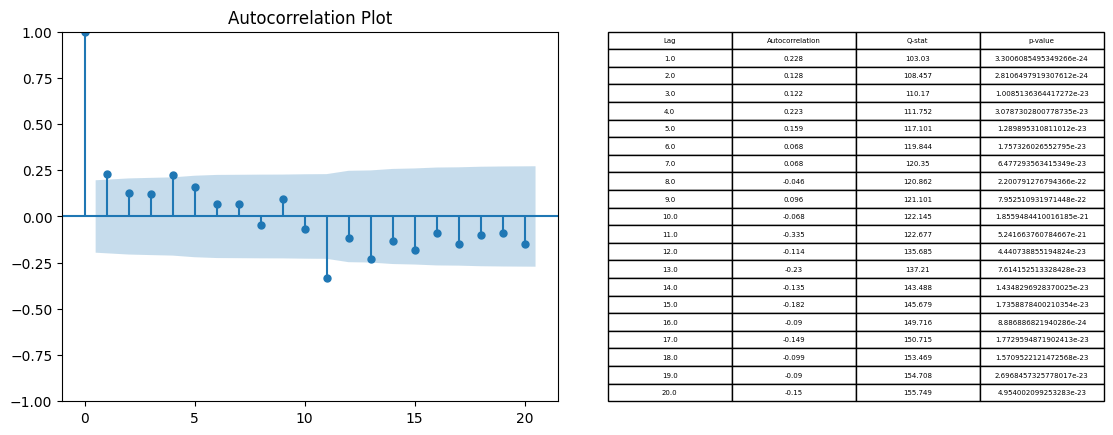

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


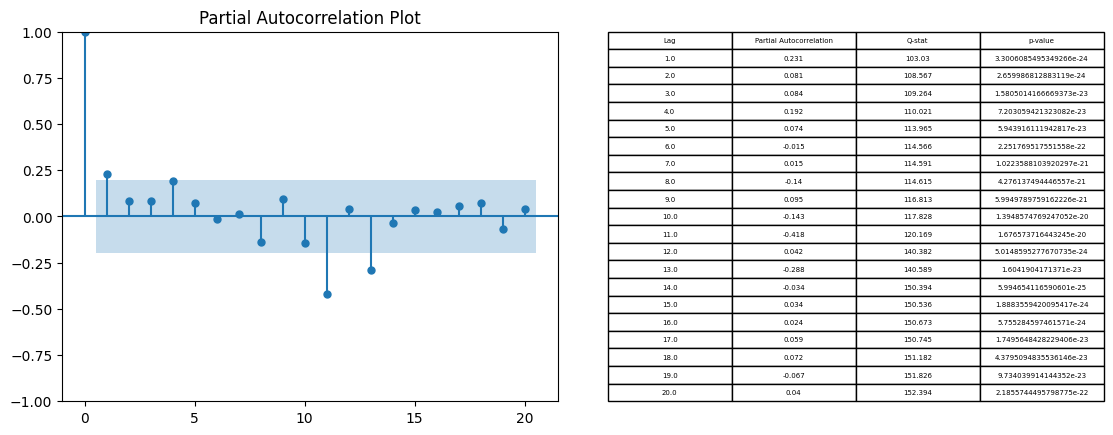

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf, q_stat
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Compute Partial Autocorrelation
n_lags = 20
autocorr = acf(df['price_diff'], nlags=n_lags)

# Compute Ljung-Box Q-Stat
qstats, pvalues = q_stat(autocorr, len(df['price_diff']))

# Plot Partial Autocorrelation
fig, ax = plt.subplots()
plot_acf(df['price_diff'], lags=n_lags, ax=ax)
plt.title('Autocorrelation Plot')

# Create table data
table_data = {
    'Lag': range(1, n_lags+1),
    'Autocorrelation': np.round(autocorr[1:n_lags+1], 3),
    'Q-stat': np.round(qstats[:n_lags], 3),
    'p-value': pvalues[:n_lags]
}

# Create DataFrame
df_table = pd.DataFrame(table_data)

# Print DataFrame on right side of plot
ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc = 'center', loc='right', bbox=[1.1, 0, 1, 1])

plt.show()

# Compute Partial Autocorrelation
n_lags = 20
pac = pacf(df['price_diff'], nlags=n_lags)

# Compute Ljung-Box Q-Stat
qstats, pvalues = q_stat(pac, len(df['price_diff']))

# Plot Partial Autocorrelation
fig, ax = plt.subplots()
plot_pacf(df['price_diff'], lags=n_lags, ax=ax)
plt.title('Partial Autocorrelation Plot')

# Create table data
table_data = {
    'Lag': range(1, n_lags+1),
    'Partial Autocorrelation': np.round(pac[1:n_lags+1], 3),
    'Q-stat': np.round(qstats[:n_lags], 3),
    'p-value': pvalues[:n_lags]
}

# Create DataFrame
df_table = pd.DataFrame(table_data)

# Print DataFrame on right side of plot
ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc = 'center', loc='right', bbox=[1.1, 0, 1, 1])

plt.show()

In [9]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error


p = [1,4,11,13]
q = [1,4,11] 
d = 1
pdq = list(itertools.product(p, [d], q))

# Creăm un DataFrame gol pentru a stoca rezultatele
results_df = pd.DataFrame(columns=['pdq', 'r_squared', 'rmse', 'aic'])

for combination in pdq:
    model = ARIMA(df['price_diff'], order=combination)
    model_fit = model.fit()
    
    predictions = model_fit.predict(start=1, end=len(df))
    
    r_squared = r2_score(df['price_diff'][1:], predictions[:-1])
    rmse = np.sqrt(mean_squared_error(df['price_diff'][1:], predictions[:-1]))
    aic = model_fit.aic
    
    temp_df = pd.DataFrame({'pdq': [combination], 'r_squared': [r_squared], 'rmse': [rmse], 'aic': [aic]})
    results_df = pd.concat([results_df, temp_df])

# Sortăm rezultatele în funcție de 'aic' în ordine crescătoare
results_df = results_df.sort_values('aic')

# Afișăm doar primele 15 rezultate
print(results_df.head(15))

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting pa

           pdq  r_squared      rmse         aic
0   (1, 1, 11)   0.342452  3.516325  562.136995
0   (13, 1, 1)   0.366504  3.451416  562.564431
0   (11, 1, 4)   0.353566  3.486480  567.196120
0   (11, 1, 1)   0.295991  3.638433  567.474121
0   (4, 1, 11)   0.344722  3.510251  567.947636
0   (13, 1, 4)   0.356799  3.477751  569.717162
0    (4, 1, 4)   0.199906  3.878784  571.831897
0  (13, 1, 11)   0.437795  3.251418  572.979218
0  (11, 1, 11)   0.410823  3.328498  573.213366
0    (1, 1, 4)   0.113469  4.082933  573.983426
0    (1, 1, 1)   0.010684  4.313132  577.193928
0    (4, 1, 1)   0.035813  4.258002  580.642786


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


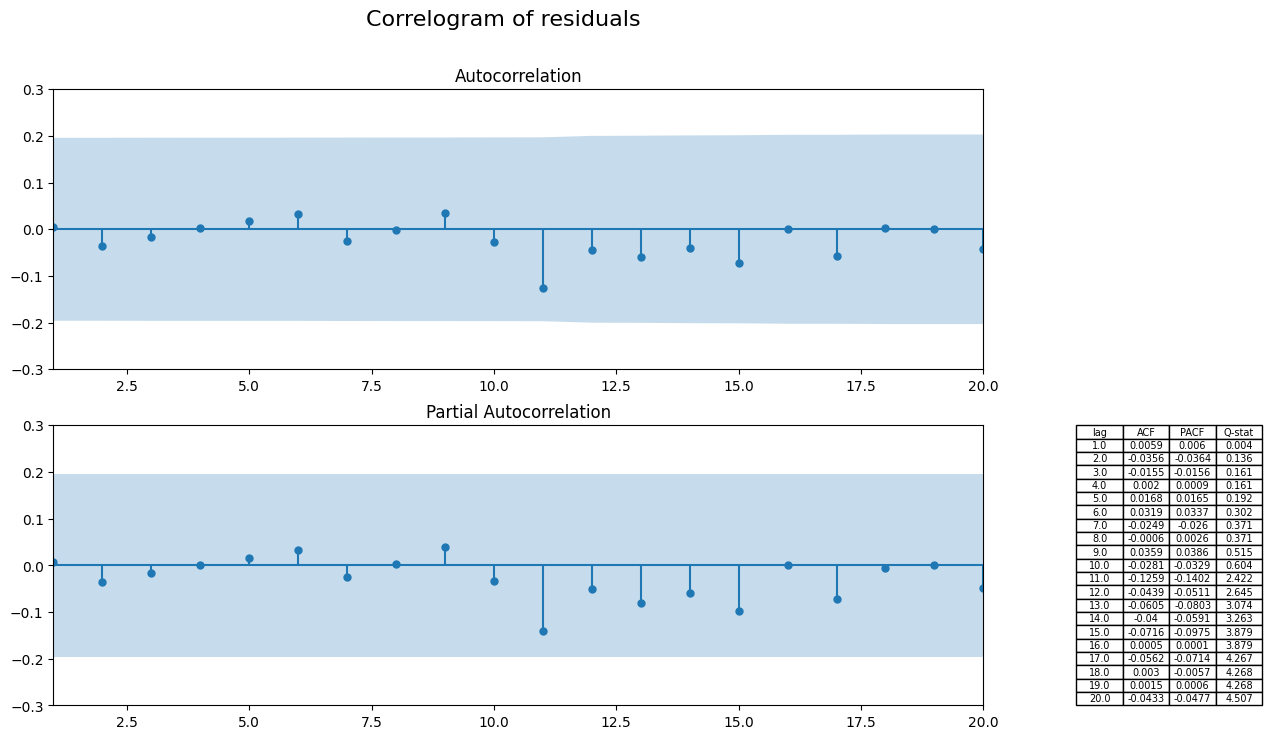

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, q_stat

# Defines and fits the model
model = ARIMA(df['Price'], order=(1, 1, 11))
model_fit = model.fit()

# Extracts the residuals
residuals = model_fit.resid

# Calculate the ACF and PACF up to 20 lags, excluding lag 0
lag_acf = acf(residuals, nlags=20)[1:]
lag_pacf = pacf(residuals, nlags=20)[1:]

# Calculate Q-statistics
q_stat_val, p_values = q_stat(lag_acf, len(residuals))
q_stat_val = q_stat_val[:20]

# Create a dataframe to hold the acf, pacf and Q-stat values, round them to 4 decimal places
acf_pacf_q_df = pd.DataFrame({'lag': range(1, 21), 'ACF': np.round(lag_acf, 4), 'PACF': np.round(lag_pacf, 4), 'Q-stat': np.round(q_stat_val, 3)})

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Create ACF plot
plot_acf(residuals, lags=20, zero=False, ax=ax1)
ax1.set_xlim(1, 20)
ax1.set_ylim(-0.3, 0.3)

# Create PACF plot
plot_pacf(residuals, lags=20, zero=False, ax=ax2)
ax2.set_xlim(1, 20)
ax2.set_ylim(-0.3, 0.3)

# Add a table at the bottom right of the figure with the acf, pacf and Q-stat values
table_acf_pacf_q = plt.table(cellText=acf_pacf_q_df.values,
                             colLabels=acf_pacf_q_df.columns,
                             cellLoc='center',
                             bbox=[1.1, 0.0, 0.2, 1.0])  # x, y, width, height

# Add a title to the figure
fig.suptitle('Correlogram of residuals', fontsize=16)

plt.show()

In [11]:
from statsmodels.stats.diagnostic import het_arch

# Realizăm testul de heteroscedasticitate (testul ARCH)
result = het_arch(residuals)

# Creăm un dataframe pentru a afișa rezultatele într-un format de tabel
result_df = pd.DataFrame({
    "Test statistic": [result[0]],
    "p-value": [result[1]],
    "f-value": [result[2]],
    "f p-value": [result[3]]
})

# Setăm stilul DataFrame-ului pentru a avea fundalul alb
pd.set_option('display.notebook_repr_html', True)
result_df = result_df.style.set_properties(**{'background-color': 'white', 
                                              'color': 'black', 
                                              'border-color': 'black'})

result_df

,Test statistic,p-value,f-value,f p-value
0,15.144082,0.126897,1.598247,0.122452


Test statistic reprezintă valoarea statistică calculată în cadrul testului ARCH. Cu cât este mai mare, cu atât există o probabilitate mai mare de a avea heteroscedasticitate în date. În cazul nostru, valoarea testului statistic este de 15.144082.
P-value reprezintă probabilitatea de a obține o valoare a testului statistic sau mai extremă, dacă ipoteza nulă (absența heteroscedasticității) este adevărată. Un p-value mai mic decât nivelul de semnificație ales (de obicei 0.05) indică o respingere a ipotezei nule. În cazul nostru, avem un p-value de 0.126897, care este mai mare decât nivelul de semnificație 0.05, ceea ce sugerează că nu avem suficiente dovezi statistice pentru a respinge ipoteza nulă.
F-value reprezintă valoarea testului F, care este calculat în cadrul testului ARCH. Acesta este utilizat pentru a evalua dacă varianța erorilor este constantă sau diferă semnificativ între diferite perioade de timp. În cazul nostru, valoarea testului F este de 1.598247.
F p-value reprezintă probabilitatea de a obține o valoare a testului F sau mai extremă, dacă ipoteza nulă (absența heteroscedasticității) este adevărată. Un p-value mai mic decât nivelul de semnificație ales indică o respingere a ipotezei nule. În cazul nostru, avem un F p-value de 0.122452, care este mai mare decât nivelul de semnificație 0.05, ceea ce sugerează că nu avem suficiente dovezi statistice pentru a respinge ipoteza nulă.
În concluzie, rezultatele testului ARCH nu oferă suficiente dovezi statistice pentru a susține existența heteroscedasticității în datele analizate. Prin urmare, putem considera că modelul nostru de previzionare este suficient de bun și că erorile sunt omoscedastice (varianța lor este constantă în timp).

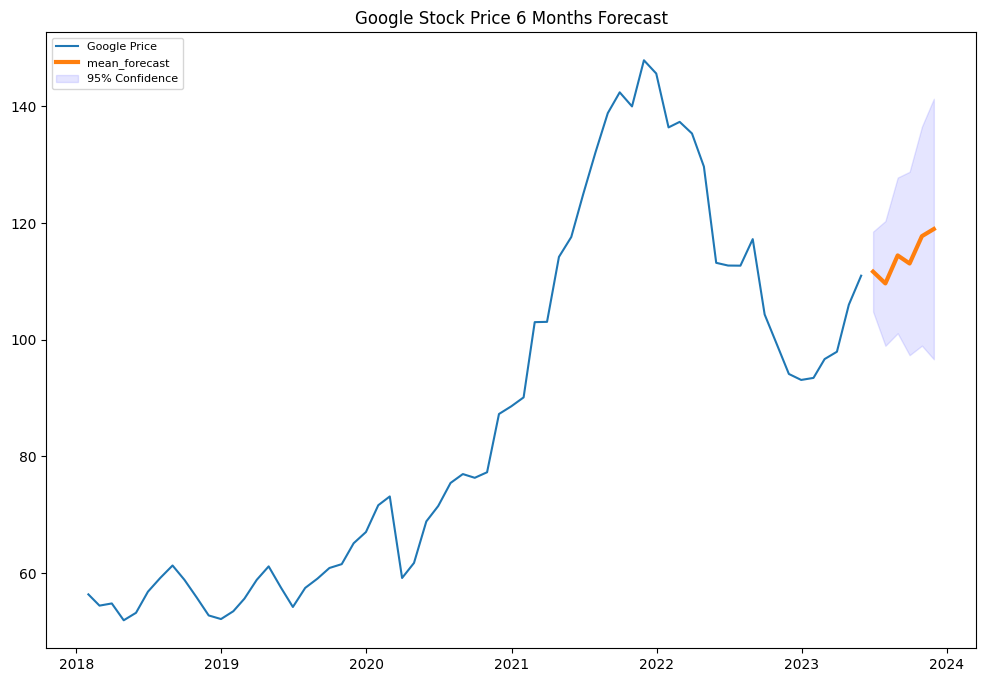

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from pandas.tseries.offsets import DateOffset
import datetime

# Generam o predicție pentru următoarele 44 de zile (aproximativ 2 luni lucrătoare)
fc = model_fit.get_forecast(steps=6)

# Setăm intervalul de încredere la 95% 
fc = fc.summary_frame(alpha=0.05)

# Obținem previziunea medie și limitele intervalului de încredere
fc_mean = fc['mean']
fc_lower = fc['mean_ci_lower']
fc_upper = fc['mean_ci_upper'] 

# Generam datele pentru predicție
future_dates =  [df.index[-1] + DateOffset(months=x) for x in range(1,7)]

# Creăm figura și trasăm datele
plt.figure(figsize=(12,8), dpi=100)
plt.plot(df['Price'].loc['2018-01-01':], label='Google Price')
plt.plot(future_dates, fc_mean, label='mean_forecast', linewidth = 3)
plt.fill_between(future_dates, fc_lower, fc_upper, color='b', alpha=.1, label = '95% Confidence')
plt.title('Google Stock Price 6 Months Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [13]:
# Presupunem că avem datele google într-un DataFrame numit 'df'
# and 'Price' is the column to be forecasted

# Definim proporția pentru setul de validare
test_size = int(len(df) * 0.10)  # 10% din date vor fi folosite pentru validare

# Split data into training and validation sets
train = df['Price'][:-test_size]
test = df['Price'][-test_size:]

# Antrenăm modelul ARIMA pe setul de antrenament
model = ARIMA(train, order=(1,1,11))
model_fit = model.fit()

# Facem previziuni pe setul de validare
forecast = model_fit.forecast(steps=test_size)
y_true = test
y_pred = forecast

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
def forecast_errors(y_true, y_pred):
    # calculate forecast errors
    errors = np.array(y_true) - np.array(y_pred)
    
    # calculate mean forecast error (Bias)
    bias = np.mean(errors)
    print('Bias: %f' % bias)

    # calculate mean absolute error (MAE)
    mae = np.mean(np.abs(errors))
    print('MAE: %f' % mae)

    # calculate root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(errors**2))
    print('RMSE: %f' % rmse)
    
    # calculate Theil's U statistic
    y_true_shift = np.roll(y_true, 1)
    theil_u = np.sqrt(np.mean((errors/y_true_shift)**2)) / (np.sqrt(np.mean((np.array(y_true_shift) - y_true_shift.mean())**2)) + np.sqrt(np.mean((np.array(y_pred) - y_pred.mean())**2)))
    print("Theil's U: %f" % theil_u)

    # Bias proportion
    bias_proportion = bias / mae
    print("Bias Proportion: %f" % bias_proportion)

    # Variance proportion
    variance_proportion = (rmse - mae) / mae
    print("Variance Proportion: %f" % variance_proportion)

    # Covariance Proportion
    covariance_proportion = 1 - variance_proportion - bias_proportion
    print("Covariance Proportion: %f" % covariance_proportion)
    
forecast_errors(y_true, y_pred)

Bias: -1.730478
MAE: 5.257964
RMSE: 6.180525
Theil's U: 0.006055
Bias Proportion: -0.329116
Variance Proportion: 0.175460
Covariance Proportion: 1.153656


Bias: Valorile negative pentru bias indică faptul că previziunile sunt subestimări în medie, cu o valoare de aproximativ -1.73. Cu alte cuvinte, media valorilor prezise este mai mică decât media valorilor observate.

MAE (Mean Absolute Error): Acesta măsoară media valorilor absolute ale diferențelor dintre valorile prezise și cele observate. MAE are o valoare de aproximativ 5.26, ceea ce înseamnă că eroarea medie absolută a previziunilor față de valorile observate este de aproximativ 5.26.

RMSE (Root Mean Square Error): Acesta este o măsură a dispersiei erorilor și este definit ca rădăcina pătrată a mediei pătratelor erorilor. RMSE are o valoare de aproximativ 6.18, ceea ce înseamnă că eroarea medie pătratică a previziunilor față de valorile observate este de aproximativ 6.18.

Theil's U: Este o măsură a acurateței relative a previziunilor. Theil's U are o valoare mică de aproximativ 0.006, ceea ce indică faptul că eroarea relativă a previziunilor față de variabilitatea datelor este foarte mică.

Bias Proportion: Reprezintă proporția dintre bias și MAE. Valorile negative indică faptul că bias-ul reprezintă o proporție mai mică față de MAE, adică impactul dezechilibrului în previziuni este relativ redus.

Variance Proportion: Reprezintă proporția dintre dispersia erorilor (RMSE - MAE) și MAE. Valorile pozitive indică faptul că varianța erorilor reprezintă o proporție semnificativă față de MAE, ceea ce sugerează că variația în previziuni este mai mare decât eroarea medie absolută.

Covariance Proportion: Reprezintă proporția rămasă (1 - Bias Proportion - Variance Proportion) și ar trebui să fie aproape de 1. Valorile ridicate indică o covarianță semnificativă între previziuni și valorile observate.

În concluzie, valorile rezultatelor indică faptul că previziunile au o eroare medie relativ mică, dar există o variație semnificativă între previziuni și valorile observate. Cu toate acestea, este important să se analizeze și contextul specific al datelor și să se ia în considerare și alți factori în evaluarea acurateței modelului.

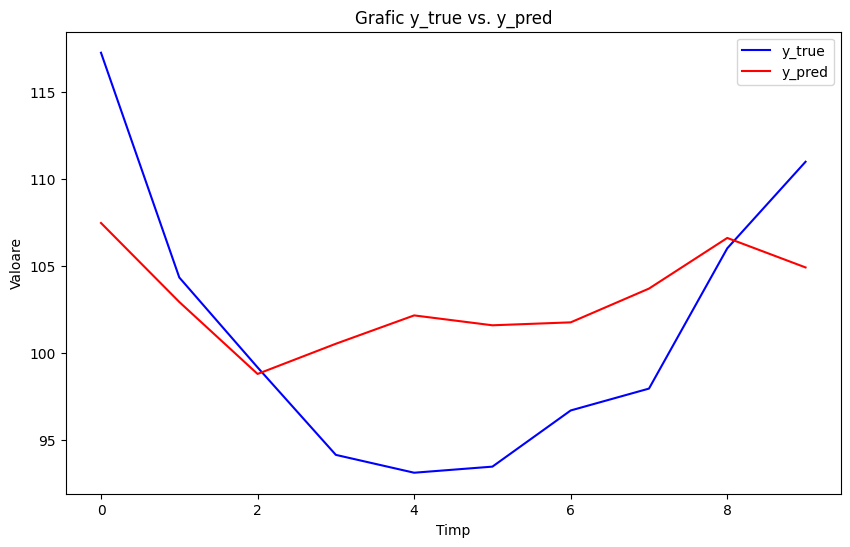

In [15]:
# Definiți valorile x pentru axa timpului (exemplu: zile)
x = range(len(y_true))

# Setați dimensiunea figurii
plt.figure(figsize=(10, 6))

# Trageți graficul pentru y_true
plt.plot(x, y_true, label='y_true', color='blue')

# Trageți graficul pentru y_pred
plt.plot(x, y_pred, label='y_pred', color='red')

# Adăugați etichetele axelor și titlul graficului
plt.xlabel('Timp')
plt.ylabel('Valoare')
plt.title('Grafic y_true vs. y_pred')

# Adăugați o legendă
plt.legend()

# Afișați graficul
plt.show()

C:\Users\razva\AppData\Local\Temp\ipykernel_20744\2192006394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return_prc'] = df['Price'].pct_change()*100


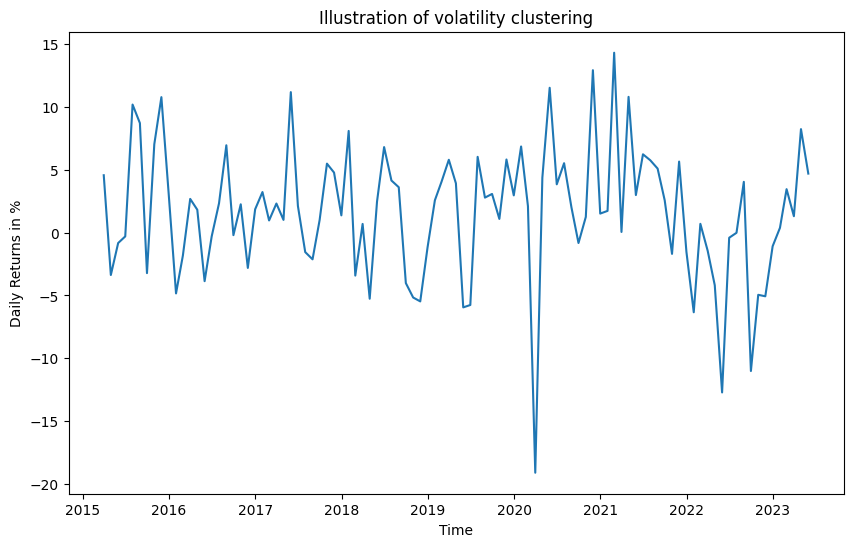

In [16]:
# df is your DataFrame and 'price' is the column with the time series
df['return_prc'] = df['Price'].pct_change()*100

plt.figure(figsize=(10, 6))
plt.plot(df['return_prc'])
plt.title('Illustration of volatility clustering')
plt.xlabel('Time')
plt.ylabel('Daily Returns in %')
plt.show()

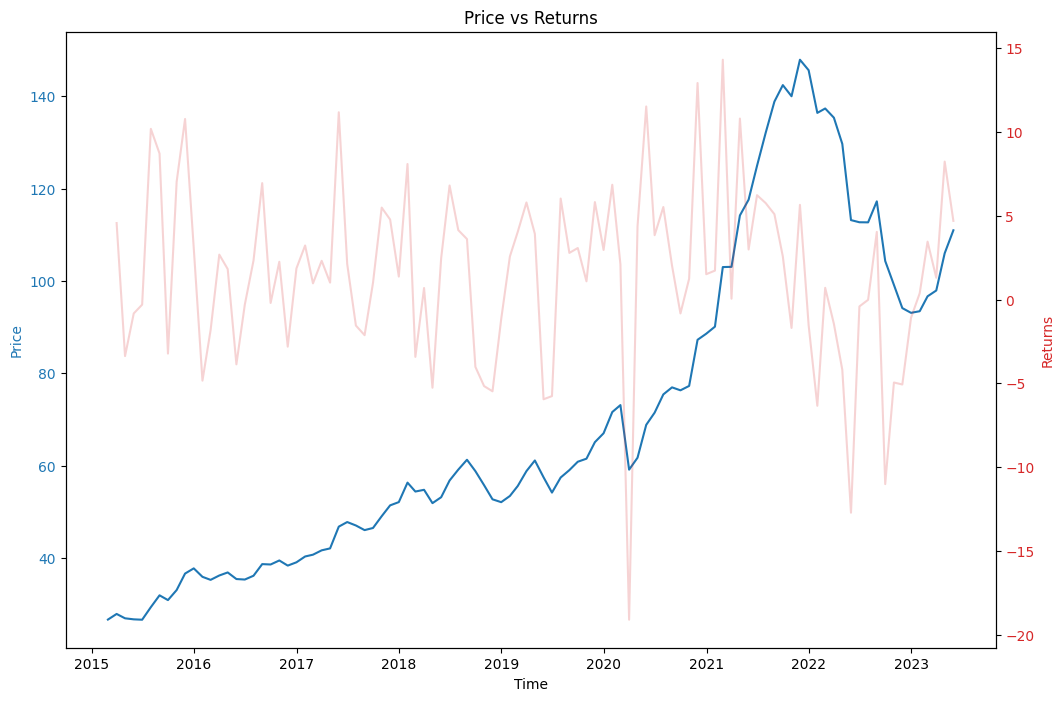

In [17]:
# Setăm dimensiunea figurii și rezoluția
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=100)

# Trasăm prețul real pe axa stângă
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color=color)
ax1.plot(df['Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Cream axa dreapta pentru randamente
ax2 = ax1.twinx()

# Trasăm randamentele pe axa dreaptă cu o opacitate redusă
color = 'tab:red'
ax2.set_ylabel('Returns', color=color)
ax2.plot(df['return_prc'], color=color, alpha=0.2)  # Modificăm valoarea alpha
ax2.tick_params(axis='y', labelcolor=color)

# Adăugăm titlul graficului
plt.title('Price vs Returns')
plt.show()

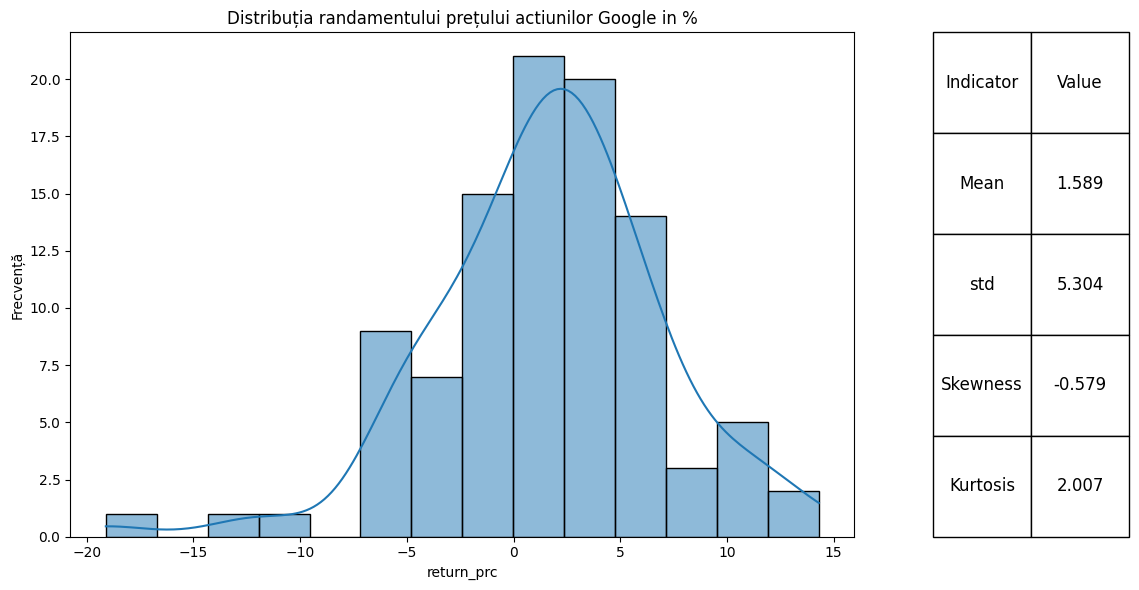

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Generăm graficul distribuției randamentului prețului Google
plt.figure(figsize=(12, 6))
sns.histplot(df['return_prc'], kde=True)
plt.xlabel('return_prc')
plt.ylabel('Frecvență')
plt.title('Distribuția randamentului prețului actiunilor Google in %')

# Calculăm indicatorii de tendință centrală
mean = df['return_prc'].mean()
std = df['return_prc'].std()
skewness = df['return_prc'].skew()
kurtosis = df['return_prc'].kurtosis()

# Rotunjim valorile la 3 decimale
mean = round(mean, 3)
std = round(std, 3)
skewness = round(skewness, 3)
kurtosis = round(kurtosis, 3)

# Creăm un tabel cu indicatorii de tendință centrală
table_data = {
    'Indicator': ['Mean', 'std', 'Skewness', 'Kurtosis'],
    'Value': [mean, std, skewness, kurtosis]
}
table_df = pd.DataFrame(table_data)

# Afișăm tabelul în dreapta graficului cu font mărit
table = plt.table(cellText=table_df.values,
                  colLabels=table_df.columns,
                  cellLoc='center',
                  bbox=[1.1, 0.0, 0.25, 1.0],  # x, y, width, height
                  fontsize=12)  # Mărimea fontului

# Stilizăm tabelul
table.auto_set_font_size(False)
table.set_fontsize(12)

# Afișăm graficul și tabelul
plt.tight_layout()
plt.show()

In [19]:
df = df.dropna()
df.head()

,Price,price_diff,return_prc
Date,,,
2015-03-31,27.941264,1.218841,4.561118
2015-04-30,26.998340,-0.942924,-3.374665
2015-05-31,26.773525,-0.224816,-0.832701
2015-06-30,26.691739,-0.081786,-0.305473
2015-07-31,29.410023,2.718284,10.183990


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


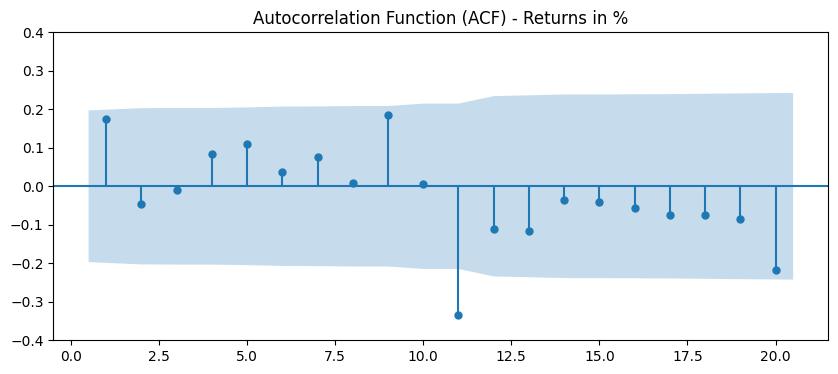

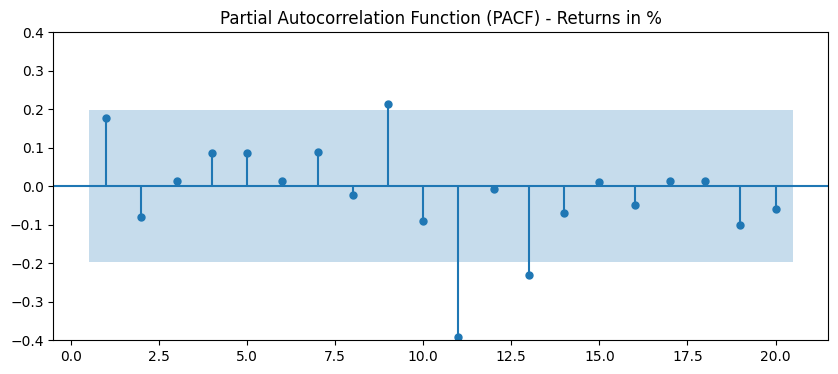

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Definim seria de timp a randamentului în procente
returns_pct = df['return_prc']

# Calculăm ACF și PACF
fig, ax1 = plt.subplots(figsize=(10, 4))
lag_acf = plot_acf(returns_pct, lags=20, zero=False, ax=ax1)
ax1.set_ylim(-0.4, 0.4)

fig, ax2 = plt.subplots(figsize=(10, 4))
lag_pacf = plot_pacf(returns_pct, lags=20, zero=False, ax=ax2)
ax2.set_ylim(-0.4, 0.4)

# Adăugăm titluri la grafice
ax1.set_title('Autocorrelation Function (ACF) - Returns in %')
ax2.set_title('Partial Autocorrelation Function (PACF) - Returns in %')

# Afișăm graficele
plt.show()

In [21]:
import warnings
from arch import arch_model

# Lista pentru a stoca rezultatele modelelor
results = []

# Loop prin valorile lui p
for p in range(1, 12):
    try:
        # Fit the ARCH(p) model
        model = arch_model(df['return_prc'], vol='ARCH', p=p)
        model_fit = model.fit(disp='off')
        
        # Calculate the AIC
        aic = model_fit.aic
        
        # Append the results to the list
        results.append((p, aic))
    
    except:
        # In cazul in care modelul nu poate fi potrivit, adaugam o valoare mare pentru AIC
        results.append((p, float('inf')))

# Sortam rezultatele in ordine descrescatoare dupa AIC
results.sort(key=lambda x: x[1])

# Afisam rezultatele
for result in results:
    print(f"ARCH({result[0]}) - AIC: {result[1]}")

ARCH(1) - AIC: 616.3128548382637
ARCH(9) - AIC: 617.2867287276206
ARCH(2) - AIC: 617.4785340749718
ARCH(11) - AIC: 618.680707334803
ARCH(10) - AIC: 619.2867287036271
ARCH(3) - AIC: 619.4785346666163
ARCH(4) - AIC: 620.9072480603412
ARCH(5) - AIC: 622.9072476987932
ARCH(6) - AIC: 624.9072477875087
ARCH(7) - AIC: 626.9072484450478
ARCH(8) - AIC: 627.8887417898486


In [26]:
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings

In [27]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [31]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 90)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [32]:
def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    x.plot(ax=axes[0][0])
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f} \nHurst: {round(hurst(x.values),2)}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    # Setează limita pe axa OY la +-0.25
    axes[1][0].set_ylim([-0.25, 0.25])
    axes[1][1].set_ylim([-0.25, 0.25])
    fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=.9)

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


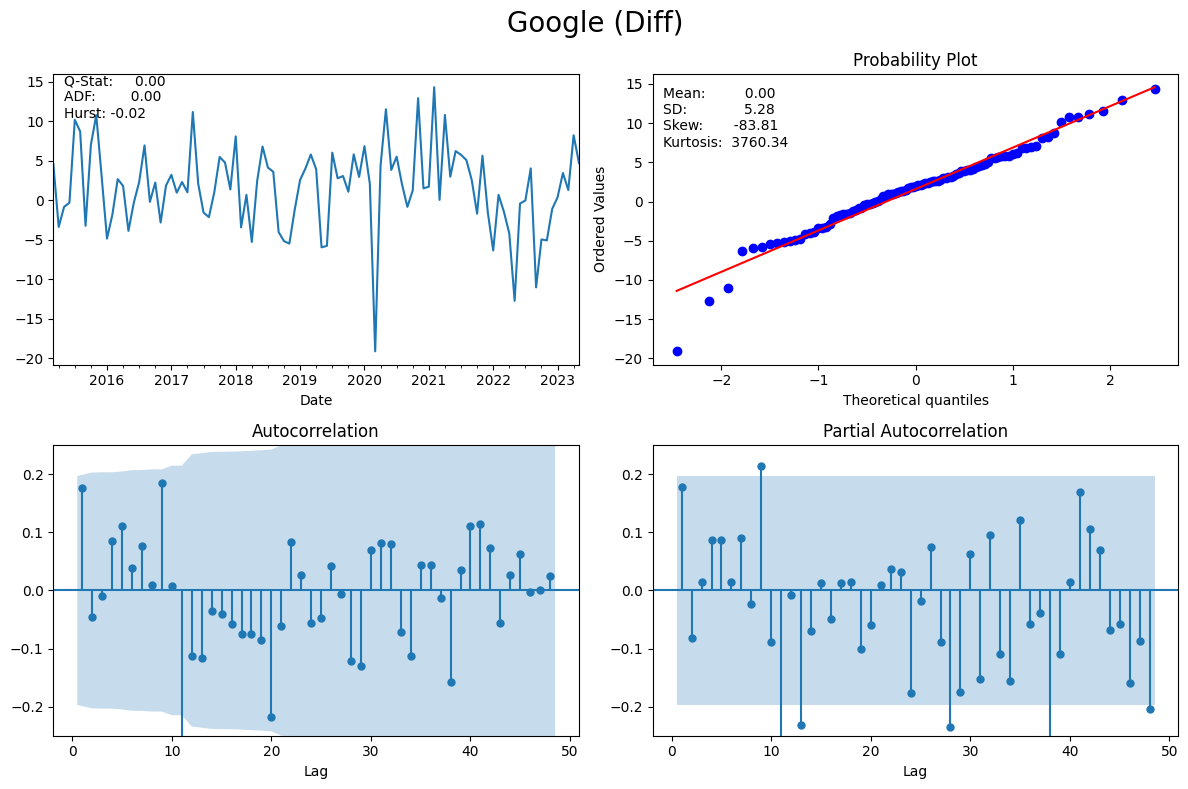

In [36]:
# Plot ACF, PACF and Q-Q plot and get ADF p-value of series
plot_correlogram(df['return_prc'], lags=48, title='Google (Diff)')

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


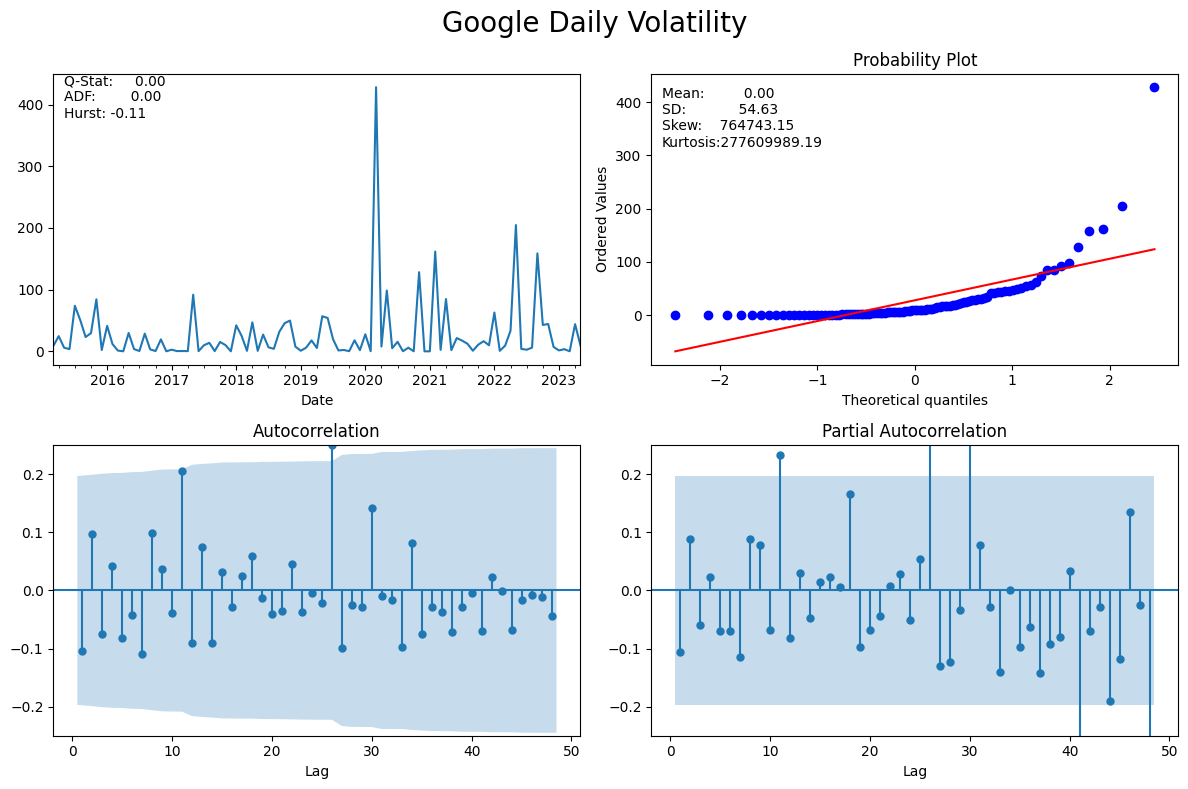

In [38]:
plot_correlogram(df['return_prc'].sub(df['return_prc'].mean()).pow(2), lags=48, title='Google Daily Volatility')

In [39]:
df['volatility'] = df['return_prc'] **2

In [40]:
# Specify GARCH model assumptions
basic_gm = arch_model(df['return_prc'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     24,   Neg. LLF: 304.2982109673328
Iteration:      8,   Func. Count:     44,   Neg. LLF: 304.0311165527026
Optimization terminated successfully    (Exit mode 0)
            Current function value: 304.0311163612327
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 8


In [41]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             return_prc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -304.031
Distribution:                  Normal   AIC:                           616.062
Method:            Maximum Likelihood   BIC:                           626.443
                                        No. Observations:                   99
Date:                Wed, May 24 2023   Df Residuals:                       98
Time:                        21:15:41   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.6470      0.543      3.035  2.405e-03 [  0.583,  2.71

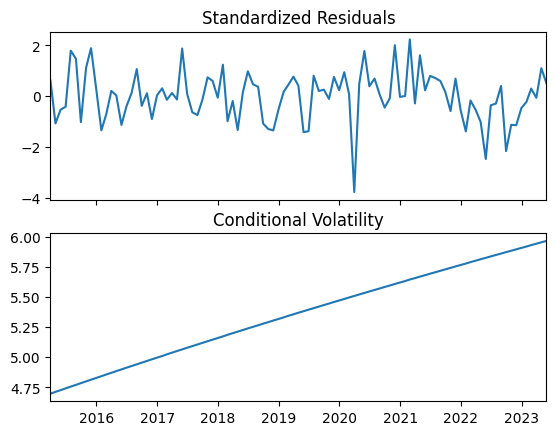

In [42]:
# Plot fitted results
gm_result.plot()
plt.show()

In [43]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                  h.1        h.2        h.3        h.4        h.5
Date                                                             
2023-05-31  35.673315  35.811135  35.948954  36.086773  36.224593


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


C:\Users\razva\AppData\Local\Temp\ipykernel_20744\4267352897.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')


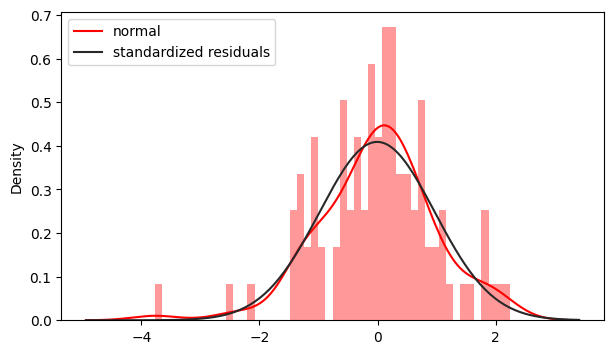

In [44]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')
plt.legend(('normal', 'standardized residuals'))
plt.show()

In [45]:
# Specify GARCH model assumptions
skewt_gm = arch_model(df['return_prc'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit(disp = 'off')

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

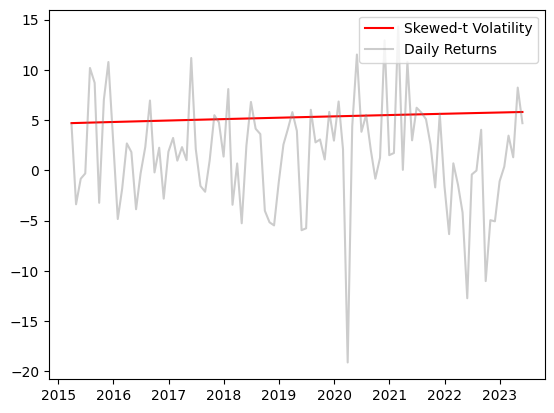

In [47]:
# Plot model fitting results
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['return_prc'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


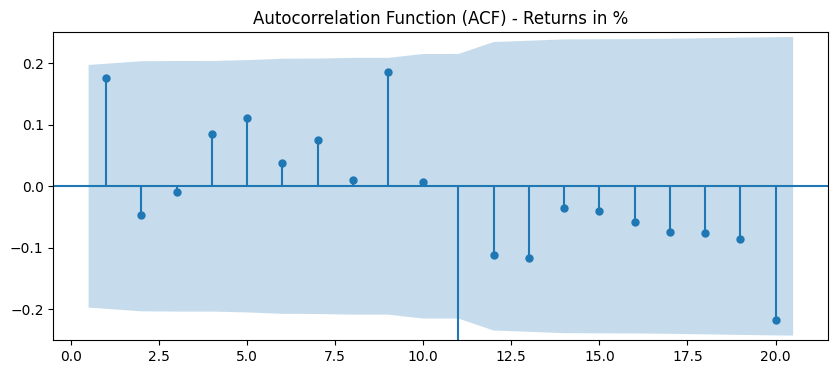

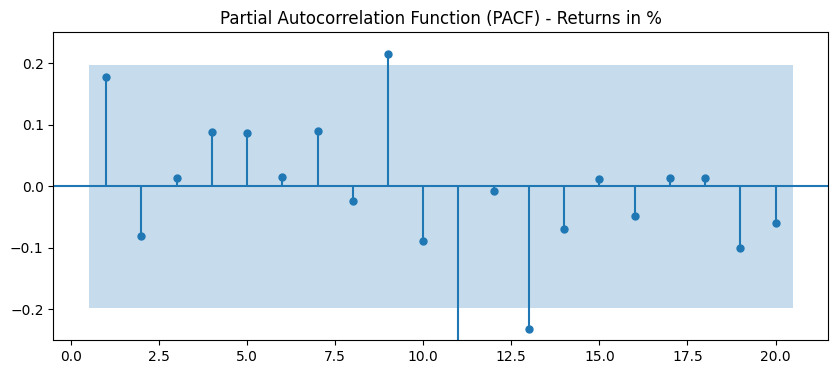

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Definim seria de timp a randamentului în procente
returns_pct = df['return_prc']

# Calculăm ACF și PACF
fig, ax1 = plt.subplots(figsize=(10, 4))
lag_acf = plot_acf(returns_pct, lags=20, zero=False, ax=ax1)
ax1.set_ylim(-0.25, 0.25)

fig, ax2 = plt.subplots(figsize=(10, 4))
lag_pacf = plot_pacf(returns_pct, lags=20, zero=False, ax=ax2)
ax2.set_ylim(-0.25, 0.25)

# Adăugăm titluri la grafice
ax1.set_title('Autocorrelation Function (ACF) - Returns in %')
ax2.set_title('Partial Autocorrelation Function (PACF) - Returns in %')

# Afișăm graficele
plt.show()

In [49]:
import warnings
from arch import arch_model

# Lista pentru a stoca rezultatele modelelor
results = []

# Loop prin valorile lui p
for p in range(1, 7):
    try:
        # Fit the ARCH(p) model
        model = arch_model(df['return_prc'], vol='ARCH', p=p)
        model_fit = model.fit(disp='off')
        
        # Calculate the AIC
        aic = model_fit.aic
        
        # Append the results to the list
        results.append((p, aic))
    
    except:
        # In cazul in care modelul nu poate fi potrivit, adaugam o valoare mare pentru AIC
        results.append((p, float('inf')))

# Sortam rezultatele in ordine descrescatoare dupa AIC
results.sort(key=lambda x: x[1])

# Afisam rezultatele
for result in results:
    print(f"ARCH({result[0]}) - AIC: {result[1]}")

ARCH(1) - AIC: 616.3128548382637
ARCH(2) - AIC: 617.4785340749718
ARCH(3) - AIC: 619.4785346666163
ARCH(4) - AIC: 620.9072480603412
ARCH(5) - AIC: 622.9072476987932
ARCH(6) - AIC: 624.9072477875087


Iteration:      1,   Func. Count:      5,   Neg. LLF: 305.6259989738959
Iteration:      2,   Func. Count:      9,   Neg. LLF: 305.41634602240543
Iteration:      3,   Func. Count:     13,   Neg. LLF: 305.31677365241563
Iteration:      4,   Func. Count:     17,   Neg. LLF: 305.2619239784987
Iteration:      5,   Func. Count:     21,   Neg. LLF: 305.1820084438877
Iteration:      6,   Func. Count:     25,   Neg. LLF: 305.1595351935531
Iteration:      7,   Func. Count:     29,   Neg. LLF: 305.1565621076482
Iteration:      8,   Func. Count:     33,   Neg. LLF: 305.15643256972
Iteration:      9,   Func. Count:     37,   Neg. LLF: 305.15642741913183
Iteration:     10,   Func. Count:     40,   Neg. LLF: 305.1564277156759
Optimization terminated successfully    (Exit mode 0)
            Current function value: 305.15642741913183
            Iterations: 10
            Function evaluations: 40
            Gradient evaluations: 10


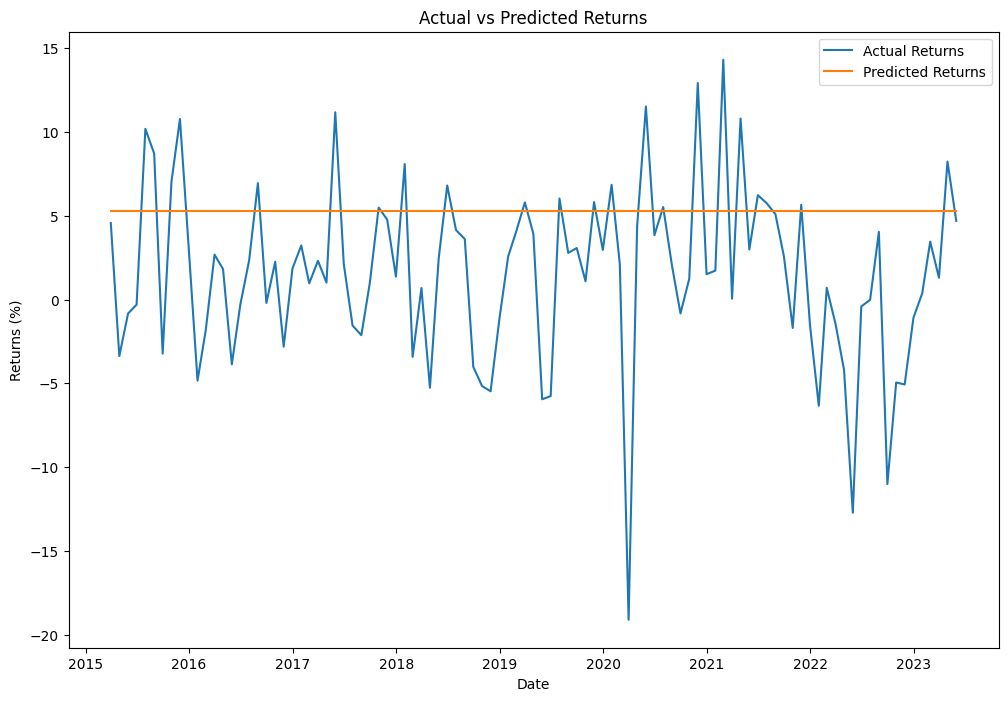

In [50]:
# Fit the ARCH(1) model
model = arch_model(df['return_prc'], vol='ARCH', p=1)
model_fit = model.fit()

# Get the predicted volatility
predicted_volatility = model_fit.conditional_volatility

# Plot the actual and predicted returns
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['return_prc'], label='Actual Returns')
plt.plot(df.index, predicted_volatility, label='Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('Actual vs Predicted Returns')
plt.legend()
plt.show()

In [51]:
from arch import arch_model
from sklearn.model_selection import train_test_split
# Presupunem că avem datele google într-un DataFrame numit 'df'
# and 'Price' is the column to be forecasted

# Definim proporția pentru setul de validare
test_size = int(len(df) * 0.20)  # 10% din date vor fi folosite pentru validare

# Split data into training and validation sets
train = df['return_prc'][:-test_size]
test = df['return_prc'][-test_size:]

# Antrenăm modelul ARIMA pe setul de antrenament
model = arch_model(train, vol='ARCH', p=1)
model_fit = model.fit()

# Facem previziuni pe setul de validare
forecasts = model_fit.forecast( horizon= test_size)
y_true = test
y_arch = forecasts.variance.values[-1, :]

Iteration:      1,   Func. Count:      5,   Neg. LLF: 243.84846228167524
Iteration:      2,   Func. Count:      9,   Neg. LLF: 243.74037710065113
Iteration:      3,   Func. Count:     13,   Neg. LLF: 243.54966936648046
Iteration:      4,   Func. Count:     17,   Neg. LLF: 243.5446247667665
Iteration:      5,   Func. Count:     21,   Neg. LLF: 243.53999595065187
Iteration:      6,   Func. Count:     25,   Neg. LLF: 243.53235091307596
Iteration:      7,   Func. Count:     29,   Neg. LLF: 243.52627609216748
Iteration:      8,   Func. Count:     33,   Neg. LLF: 243.52415068376956
Iteration:      9,   Func. Count:     37,   Neg. LLF: 243.52389107003899
Iteration:     10,   Func. Count:     41,   Neg. LLF: 243.52387840833657
Iteration:     11,   Func. Count:     44,   Neg. LLF: 243.52387870944443
Optimization terminated successfully    (Exit mode 0)
            Current function value: 243.52387840833657
            Iterations: 11
            Function evaluations: 44
            Gradient eval

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:             return_prc   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -243.524
Distribution:                  Normal   AIC:                           493.048
Method:            Maximum Likelihood   BIC:                           500.194
                                        No. Observations:                   80
Date:                Wed, May 24 2023   Df Residuals:                       79
Time:                        22:00:58   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.2213      0.571      3.892  9.931e-05 [  1.103,  3.340]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         25.7980      6.307      4.090  4.306e-05 [ 13.437, 38.159]
alpha[1]       0.0000  8.360e-02      0.000      1.000 [ -0.164,  0.164]
========================================================================

Covariance estimator: robust
"""